<a href="https://colab.research.google.com/github/LuisFelipeOrtolan/QuarentenaDados-Alura/blob/master/Aula03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importando base de dados de 5000 filmes do imdb

In [38]:
imdb = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv")
imdb = imdb.drop_duplicates()
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Explorando a coluna *color* e seus valores possíveis

In [39]:
imdb["color"].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [40]:
imdb["color"].value_counts()

Color               4772
 Black and White     207
Name: color, dtype: int64

In [41]:
imdb["color"].value_counts(normalize = "True")

Color               0.958425
 Black and White    0.041575
Name: color, dtype: float64

Analisando rapidamente os dados, vemos que mais de 95% dos filmes registrados nessa amostra são coloridos, enquanto menos que 5% são preto e brancos. Além disso, temos alguns filmes em que a informação sobre não ser ou ser colorido  não existia. Agora a coluna será substituída por um valor booleano, indicando se aquele filme é colorido (1) ou não (0).

In [58]:
cor_bool = imdb.query("color in ['Color',' Black and White']").copy()
cor_bool["color"] = (cor_bool["color"]=="Color") * 1
cor_bool["color"].value_counts()

1    4772
0     207
Name: color, dtype: int64

Agora, será explorado os diretores com mais filmes nessa base de dados.

In [43]:
imdb["director_name"].value_counts().head()

Steven Spielberg    26
Woody Allen         22
Martin Scorsese     20
Clint Eastwood      20
Ridley Scott        17
Name: director_name, dtype: int64

Além disso, é possível analisar o número de críticas por filme

In [44]:
imdb["num_critic_for_reviews"].describe()

count    4949.000000
mean      139.890079
std       121.477586
min         1.000000
25%        50.000000
50%       110.000000
75%       195.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

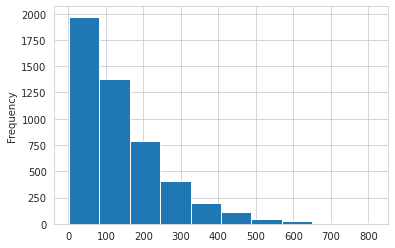

In [45]:
sns.set_style("whitegrid")

imdb["num_critic_for_reviews"].plot(kind='hist')
plt.show()

Nessa parte, analisaremos o lado financeiro dos filmes, como lucro, orçamento e receita. O primeiro passo é observar a receita do filme.
Aqui, uma observação importante, a receita de alguns países está na sua moeda local, e portanto há uma confusão entre os valores de múltiplos países, por isso, só será trabalhado os valores de um único país, nesse caso, os Estados Unidos, por ser um dos maiores produtores de filmes do mundo.

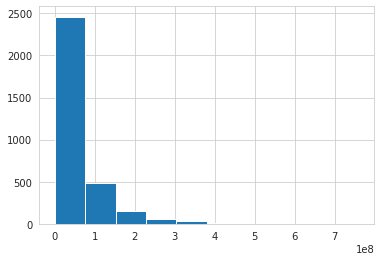

In [48]:
imdb_usa = imdb.query("country == 'USA'")
imdb_usa["gross"].hist()
plt.show()

A grande maioria dos filmes fez entre 50.000.000 e 100.000.000 de dólares como é possível ver no gráfico. Agora é interessante criar uma coluna com o lucro dos filmes para comparações: 

In [0]:
imdb_usa = imdb_usa.dropna()
imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']

Com essas informações, é possível produzir alguns gráficos para análise dos dados:

Orçamento por Receita

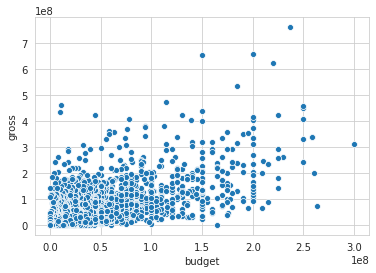

In [67]:
budget_gross = imdb_usa[["budget", "gross"]].copy()
sns.scatterplot(data = budget_gross, x = "budget", y = "gross")
plt.show()

Orçamento por Lucro

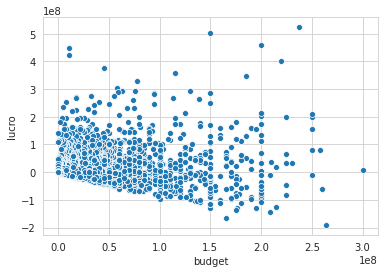

In [68]:
budget_lucro = imdb_usa[["budget","lucro"]].copy()
sns.scatterplot(data = budget_lucro, x = "budget", y = "lucro")
plt.show()

Lucro por Ano de Lançamento

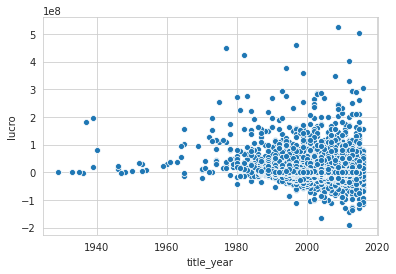

In [70]:
lucro_ano = imdb_usa[["lucro","title_year"]].copy()
sns.scatterplot(data = lucro_ano, x = "title_year", y = "lucro")
plt.show()

Além de tudo, é possível fazer vários gráficos diferentes com todas essas informações (receita, orçamento, ano do filme e lucro): 

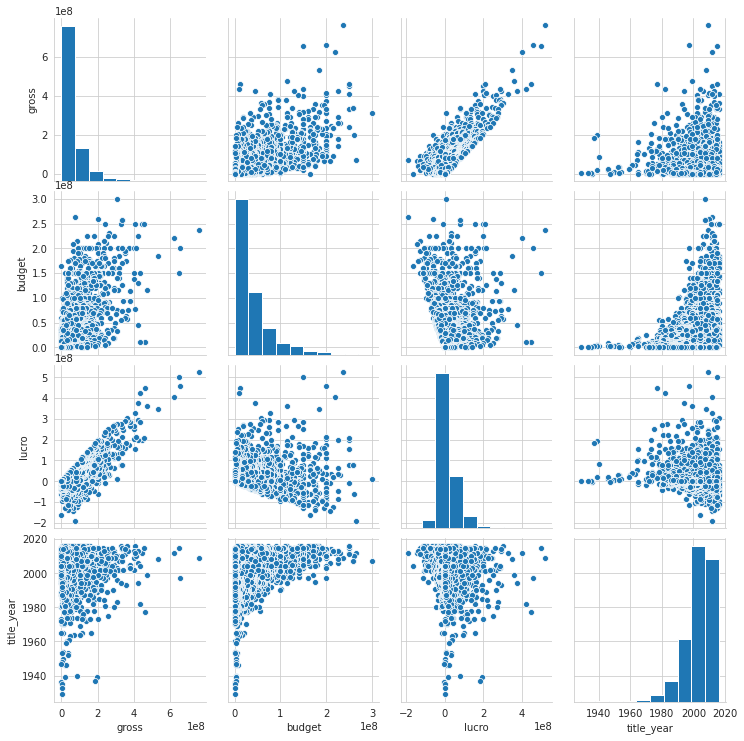

In [71]:
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]])
plt.show()

É interessante também vermos se existe alguma correlação entre as variáveis estudadas, para isso, calculemos elas:

In [72]:
imdb_usa[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.639434,0.798102,0.054028
budget,0.639434,1.000000,0.047087,0.247331
lucro,0.798102,0.047087,1.000000,-0.123632
title_year,0.054028,0.247331,-0.123632,1.000000
